https://github.com/chengsong990020186/CreditScoreModel 
用的是decision tree

# macro indicator

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [39]:
GDP = pd.read_csv('/Users/mengjiatan/Desktop/credit/GDP.csv')

In [41]:
UNRATE = pd.read_csv('/Users/mengjiatan/Desktop/credit/UNRATE.csv')

In [42]:
TB3M = pd.read_csv('/Users/mengjiatan/Desktop/credit/TB3MS.csv')

In [45]:
#drop the data before 1954-07-01 for GDP and UNRATE and TB3M
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
cutoff_date = pd.to_datetime('1954-07-01')
GDP = GDP[GDP['DATE'] >= cutoff_date]

UNRATE['DATE'] = pd.to_datetime(UNRATE['DATE'])
UNRATE = UNRATE[UNRATE['DATE'] >= cutoff_date]

TB3M['DATE'] = pd.to_datetime(TB3M['DATE'])
TB3M = TB3M[TB3M['DATE'] >= cutoff_date]

/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_96897/2768854711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP['DATE'] = pd.to_datetime(GDP['DATE'])


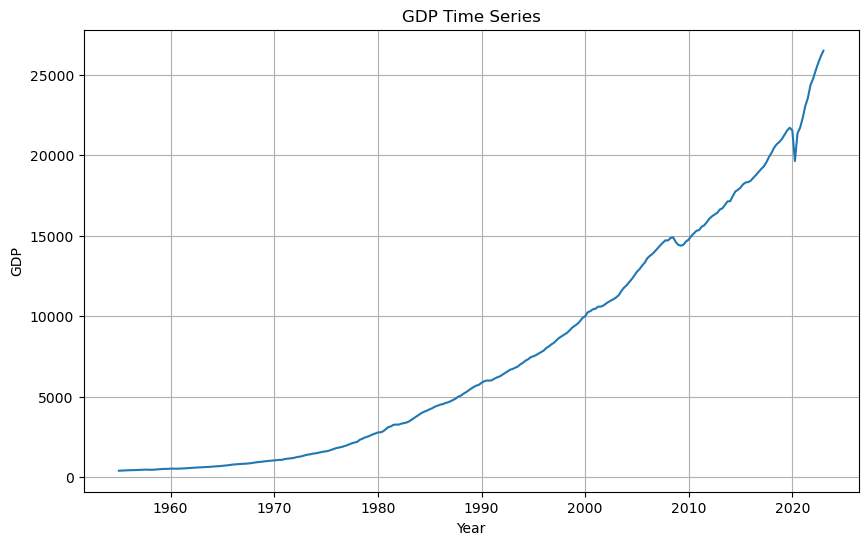

In [59]:
# Plot the GDP time series data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(GDP['DATE'], GDP['GDP'])
plt.title('GDP Time Series')  # Set the title
plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('GDP')  # Set the y-axis label
plt.grid(True)  # Enable the grid
plt.show()

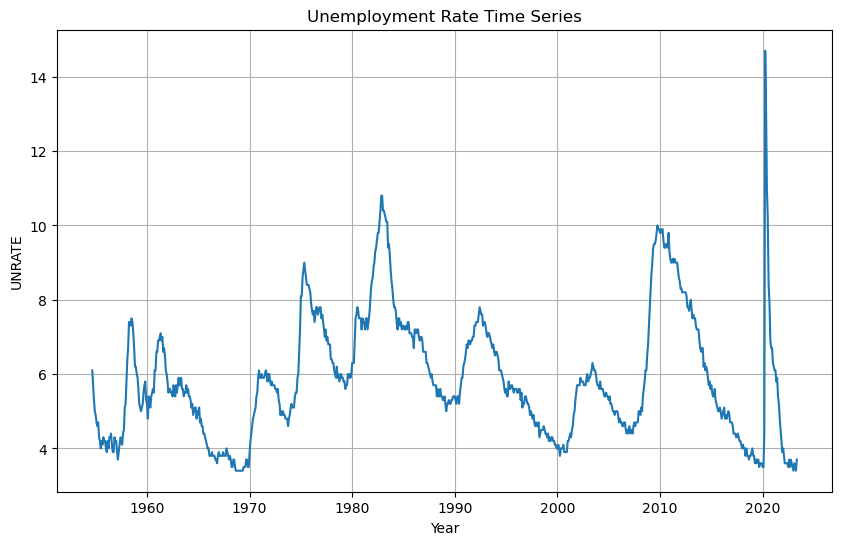

In [60]:
# Plot the UNRATE time series data
plt.figure(figsize=(10, 6))  
plt.plot(UNRATE['DATE'], UNRATE['UNRATE'])
plt.title('Unemployment Rate Time Series') 
plt.xlabel('Year')  
plt.ylabel('UNRATE')  
plt.grid(True)
plt.show()

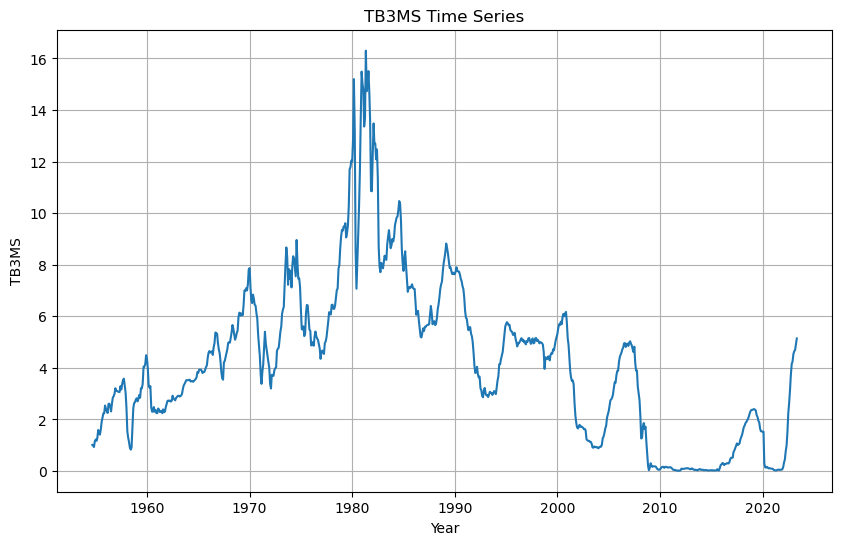

In [61]:
# Plot the TB3M time series data
plt.figure(figsize=(10, 6))  
plt.plot(TB3M['DATE'], TB3M['TB3MS'])
plt.title('TB3MS Time Series') 
plt.xlabel('Year')  
plt.ylabel('TB3MS')  
plt.grid(True)
plt.show()

In [62]:
#The GDP series shows exponential growth and has a larger scale than the other variables. Because GDP percent growth from quarter to quarter is common to report, is close in scale to the other variables, 
#and is required by the credit models in Part 2, try to stabilize the series by computing its percent returns.
GDP['GDP_Returns'] = GDP['GDP'].pct_change() * 100
# Drop the first line
GDP = GDP.drop(GDP.index[0])

# Calculate the first difference for UNRATE
UNRATE['UNRATE_diff'] = UNRATE['UNRATE'].diff()
UNRATE = UNRATE.drop(UNRATE.index[0])

TB3M['TB3MDiff'] = TB3M['TB3MS'].diff()
TB3M = TB3M.drop(TB3M.index[0])

In [68]:
df = pd.concat([GDP['DATE'], GDP['GDP_Returns'],UNRATE['UNRATE_diff'], TB3M['TB3MDiff']],axis=1)
# Drop rows with NaN values
df = df.dropna()
df

,DATE,GDP_Returns,UNRATE_diff,TB3MDiff
249,2009-04-01,-0.344157,0.0,-0.03
250,2009-07-01,0.470377,0.0,-0.05
251,2009-10-01,1.400565,0.0,0.22
252,2010-01-01,0.773743,0.0,0.07
253,2010-04-01,1.460127,0.0,-0.05
254,2010-07-01,1.077503,0.0,0.11
255,2010-10-01,1.108641,0.0,0.31
256,2011-01-01,0.274164,0.0,-0.14
257,2011-04-01,1.342486,0.1,-0.04
258,2011-07-01,0.579436,0.0,0.19


In [69]:
df.set_index('DATE', inplace=True)
df

,GDP_Returns,UNRATE_diff,TB3MDiff
DATE,,,
2009-04-01,-0.344157,0.0,-0.03
2009-07-01,0.470377,0.0,-0.05
2009-10-01,1.400565,0.0,0.22
2010-01-01,0.773743,0.0,0.07
2010-04-01,1.460127,0.0,-0.05
2010-07-01,1.077503,0.0,0.11
2010-10-01,1.108641,0.0,0.31
2011-01-01,0.274164,0.0,-0.14
2011-04-01,1.342486,0.1,-0.04


In [70]:
# Fitting VAR model with 2 lags
model = VAR(df)
results = model.fit(2)  

# The fitted VAR model "results" contains all the information about the model.


/Users/mengjiatan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [71]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Jul, 2023
Time:                     11:35:52
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -4.38596
Nobs:                     54.0000    HQIC:                  -4.86115
Log likelihood:          -69.5628    FPE:                 0.00577017
AIC:                     -5.15945    Det(Omega_mle):      0.00400295
--------------------------------------------------------------------
Results for equation GDP_Returns
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  1.626312         0.369382            4.403           0.000
L1.GDP_Returns        -0.322853         0.146276           -2.207           0.027
L1.UNRATE_diff        -2.193188         1.730846  

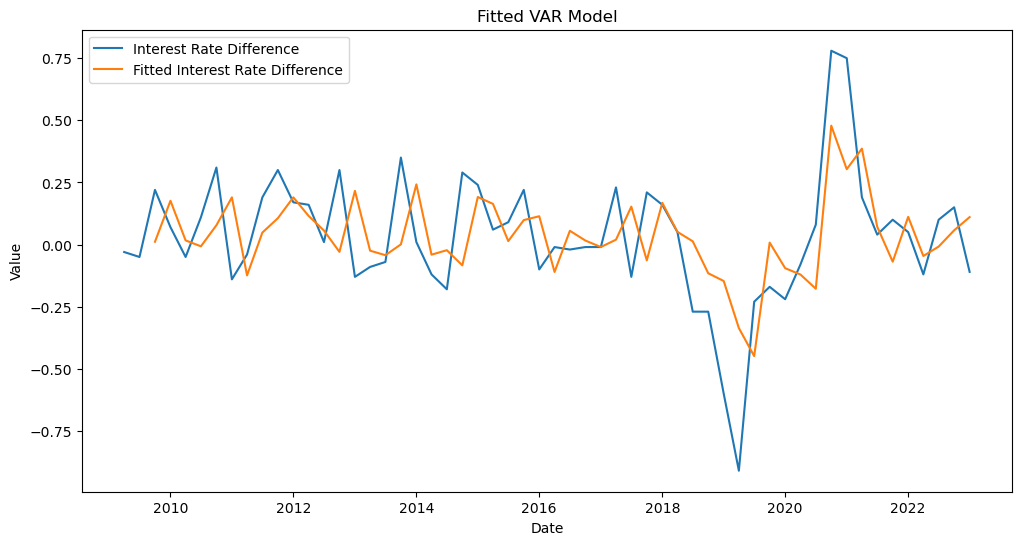

In [76]:
lag_order = results.k_ar  # Optimal lag order
fitted_values = results.fittedvalues
plt.figure(figsize=(12, 6))
#plt.plot(df.index, df['GDP_Returns'], label='GDP Returns')
#plt.plot(df.index, df['UNRATE_diff'], label='Unemployment Rate Difference')
plt.plot(df.index, df['TB3MDiff'], label='Interest Rate Difference')
#plt.plot(df.index[lag_order:], fitted_values['GDP_Returns'], label='Fitted GDP Returns')
#plt.plot(df.index[lag_order:], fitted_values['UNRATE_diff'], label='Fitted Unemployment Rate Difference')
plt.plot(df.index[lag_order:], fitted_values['TB3MDiff'], label='Fitted Interest Rate Difference')
plt.legend()
plt.title('Fitted VAR Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

The GDP_Returns is significantly influenced by its own lags (especially at lag 2 where p<0.05) and not much by the lags of other variables, as their p-values are greater than 0.05, which means they are not statistically significant at the 5% level.

The UNRATE_diff is significantly influenced by its own second lag (L2.UNRATE_diff with p-value < 0.05).

The TB3MDiff is significantly influenced by its own first lag (L1.TB3MDiff with p-value < 0.05) and the first and second lags of GDP_Returns.

# forecast macroeconomic scenarios

In [81]:
NumPeriods = 30

# Forecast
forecast_input = df.values[-2:]
forecast_output = results.forecast(y=forecast_input, steps=NumPeriods)


forecast_dates = pd.date_range(start=df.index[-1], periods=NumPeriods + 1, freq='Q')[1:]

forecast_df = pd.DataFrame(forecast_output, index=forecast_dates, columns=df.columns)

# Creating TB3MS by cumulatively summing TB3MSDIFF
forecast_df['TB3MS'] = forecast_df['TB3MDiff'].cumsum()

# Adding the forecast to the original data
final_df = pd.concat([df, forecast_df])

In [90]:
forecast_df

,GDP_Returns,UNRATE_diff,TB3MDiff,TB3MS
2023-06-30,1.177206,-0.008280,-0.101914,-0.101914
2023-09-30,0.921002,0.000562,-0.027966,-0.129880
2023-12-31,1.070029,0.015277,0.005355,-0.124525
2024-03-31,1.128272,0.023275,0.027700,-0.096825
2024-06-30,1.130826,0.025234,0.034334,-0.062491
2024-09-30,1.145503,0.025916,0.033710,-0.028781
2024-12-31,1.143311,0.026138,0.032699,0.003918
2025-03-31,1.139623,0.026037,0.031701,0.035618
2025-06-30,1.138843,0.026029,0.031154,0.066772
2025-09-30,1.137876,0.026043,0.031027,0.097800


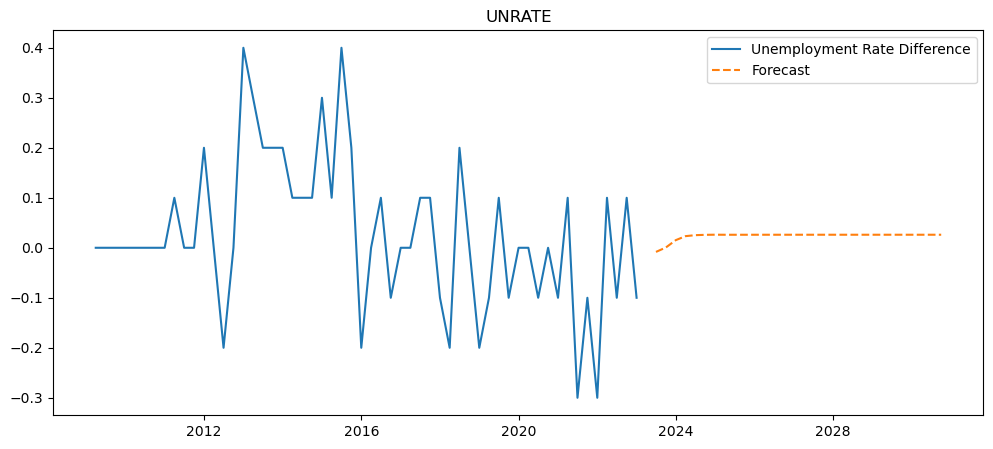

In [92]:
# Plot UNRATE_diff
plt.figure(figsize=(12,5))
plt.plot(df.index, df['UNRATE_diff'], label='Unemployment Rate Difference')
plt.plot(forecast_df.index, forecast_df['UNRATE_diff'], linestyle='--', label='Forecast')
plt.title('UNRATE')
plt.legend()
plt.show()

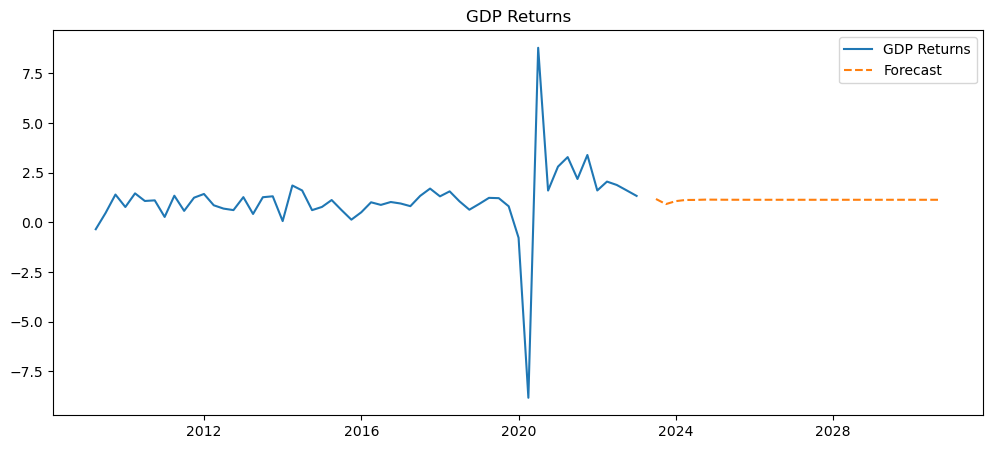

In [93]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['GDP_Returns'], label='GDP Returns')
plt.plot(forecast_df.index, forecast_df['GDP_Returns'], linestyle='--', label='Forecast')
plt.title('GDP Returns')
plt.legend()
plt.show()

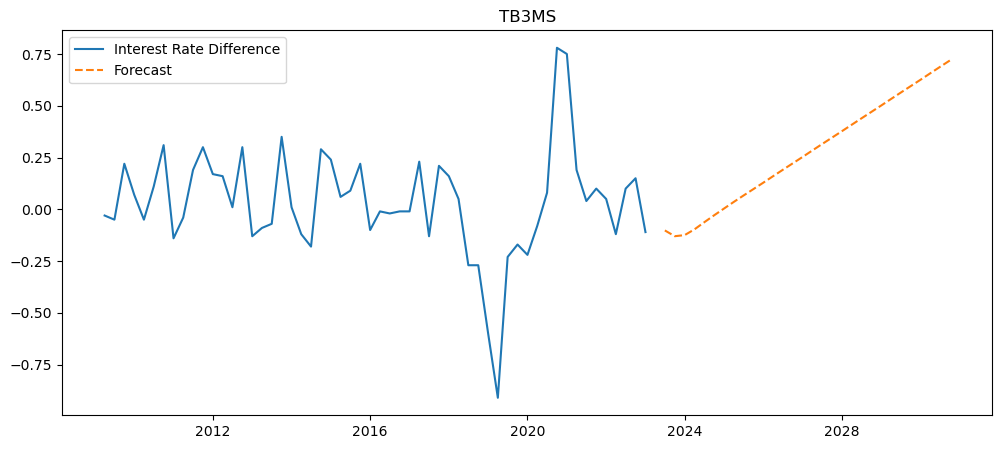

In [97]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['TB3MDiff'], label='Interest Rate Difference')
plt.plot(forecast_df.index, forecast_df['TB3MS'], linestyle='--', label='Forecast')
plt.title('TB3MS')
plt.legend()
plt.show()

# ECL